# Simulation data

In [1]:
%matplotlib inline
import matplotlib.pylab as plt
import os, sys, glob
import numpy as np

from IPython.display import HTML
from matplotlib import rc
rc('animation', html='html5')

%load_ext autoreload
%autoreload 2
import cellshapy

Reading config from /home/debacwa/.config/cellshapy


/home/debacwa/Work/cellshapy/cellshapy/config/features.py:23: UserWarning: Package mahotas is missing. Some features are not available


# Import data

In [308]:
data_folder = '/data/debacwa/cellshapy/dataset-apical-emergence/'

- import annotation

In [309]:
import pandas as pd
import os
fn = os.path.join(data_folder, 'annotation.csv')
annotation = pd.read_csv(fn, index_col=0, squeeze=True).to_dict('records')
annotation

[{'condition': 'CONTROLS', 'label': 0},
 {'condition': 'CONTROLS', 'label': 0},
 {'condition': 'CONTROLS', 'label': 0},
 {'condition': 'CONTROLS', 'label': 0},
 {'condition': 'CONTROLS', 'label': 0},
 {'condition': 'CONTROLS', 'label': 0},
 {'condition': 'CONTROLS', 'label': 0},
 {'condition': 'CONTROLS', 'label': 0},
 {'condition': 'CONTROLS', 'label': 0},
 {'condition': 'CONTROLS', 'label': 0},
 {'condition': 'CONTROLS', 'label': 0},
 {'condition': 'a_tub_DN_RHOA', 'label': 1},
 {'condition': 'a_tub_DN_RHOA', 'label': 1},
 {'condition': 'a_tub_DN_RHOA', 'label': 1},
 {'condition': 'a_tub_DN_RHOA', 'label': 1},
 {'condition': 'a_tub_DN_RHOA', 'label': 1},
 {'condition': 'a_tub_DN_RHOA', 'label': 1},
 {'condition': 'a_tub_DN_RHOA', 'label': 1},
 {'condition': 'a_tub_DN_RHOA', 'label': 1},
 {'condition': 'a_tub_DN_RHOA', 'label': 1},
 {'condition': 'a_tub_DN_RHOA', 'label': 1},
 {'condition': 'a_tub_DN_RHOA', 'label': 1},
 {'condition': 'a_tub_DN_RHOA', 'label': 1},
 {'condition': 'a_tu

- import video data

In [310]:
filenames = os.path.join(data_folder, '*.tif')
vc = cellshapy.VideoCollection.from_glob(filenames, annotations=annotation, composite=True, normalize_distances=False)

Creating VideoCollection from glob expression /data/debacwa/cellshapy/dataset-apical-emergence/*.tif: 26 video files or directories
Creating VideoCollection from list of paths. 26 video files or directories


Iteration 1, error: 0.000033, time: 3.10 sec
5200 contours aligned in 6.41 sec


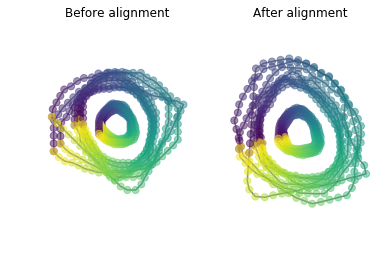

In [311]:
_ = vc.align_contours(show_samples=10)

In [312]:
#HTML(vc.show())

# Shape analysis

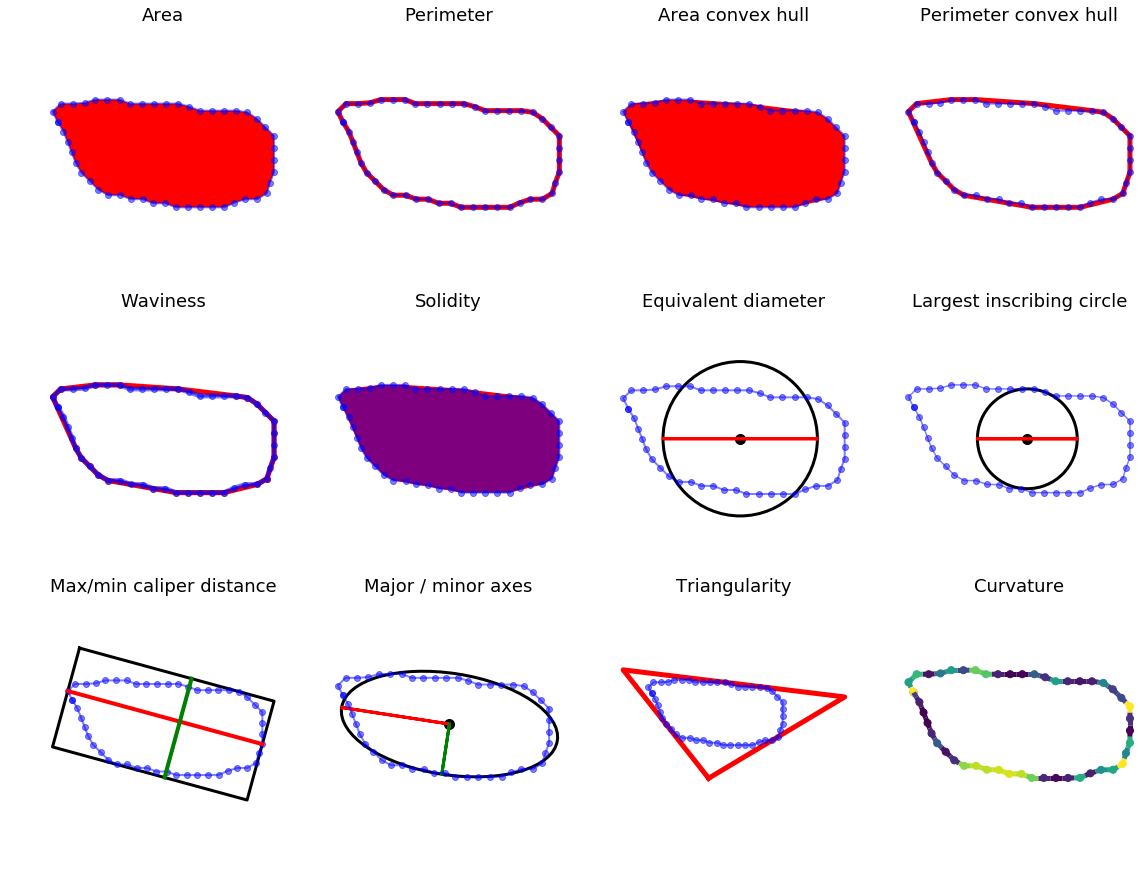

In [313]:
from cellshapy.utils.contours import extract_shape_descriptors
_ = vc[-2][-2].extract_shape_descriptors(plot=True, skeleton=False)

# Morph analysis

## VAE

/home/debacwa/Work/cellshapy/cellshapy/data/videocollection.py:717: UserWarning: VAE is experimental! Limited compatibility.
/home/debacwa/Work/cellshapy/cellshapy/analysis/vae.py:66: UserWarning: Tensor was zero-padded from (26, 200, 96) to (26, 208, 96).


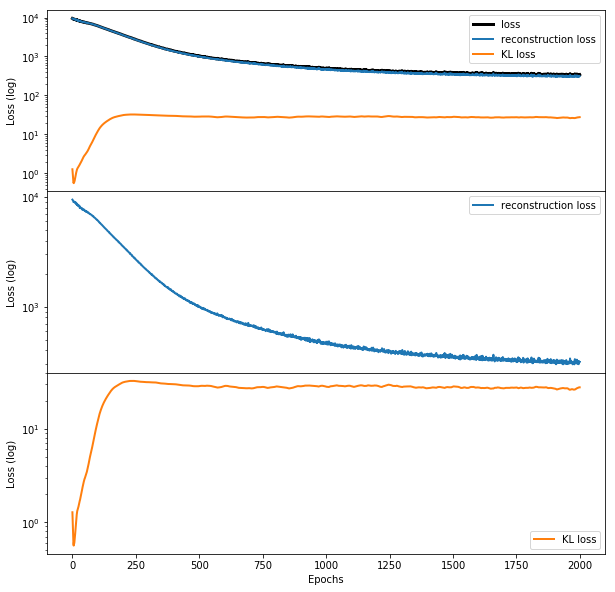

In [314]:
format = 'stxy'
vc.embed_morphs(format, 'vae', n_components=2, plot=False, verbose=False)

components = None


/home/debacwa/Work/cellshapy/cellshapy/plotting/morphspace.py:93: UserWarning: Projecting from 2 components to 2D using pca.


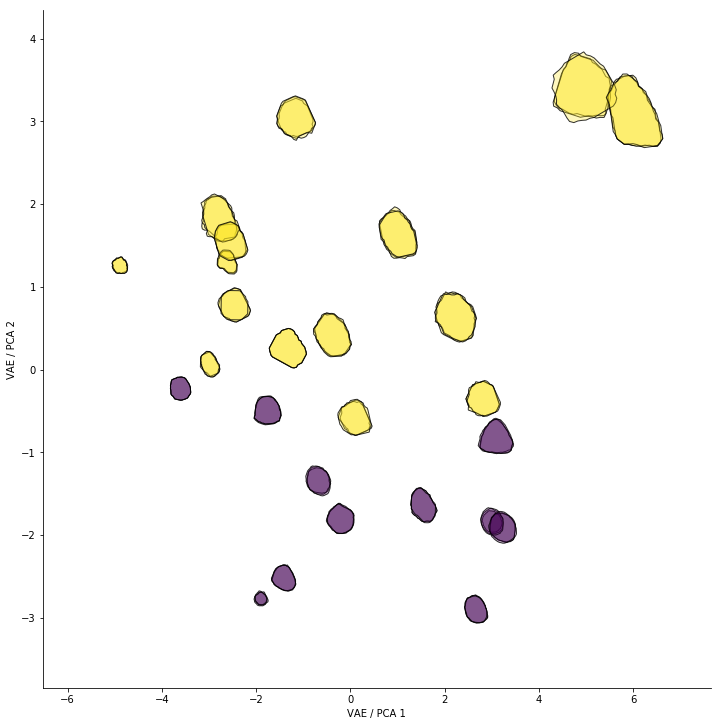

In [320]:
f=20
fig = vc.morph_space(format, 'vae', animate=False, frames=[f,f+2,f+4], 
                     shape_size=1, alpha_face=0.3, alpha_edge=0.7, 
                     colorcode='label', projection='pca')


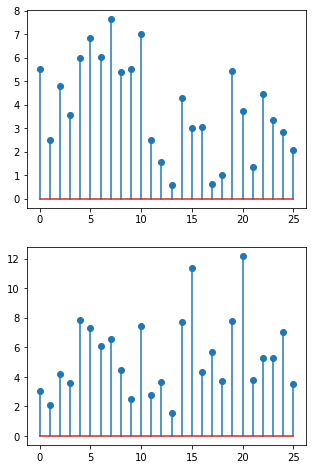

In [321]:
embeddings = vc.embedding[('stxy', 'vae')]
fig, ax = plt.subplots(len(embeddings.T), 1, figsize=(5,4*len(embeddings.T)))
for a, f in zip(ax, embeddings.T):
    a.stem(f)


- Reconstruct a sample

(1, 99, 48, 2)
(1, 99, 96)
(99, 96)
[[-2.0126455 -6.9064565]]
(1, 99, 96)


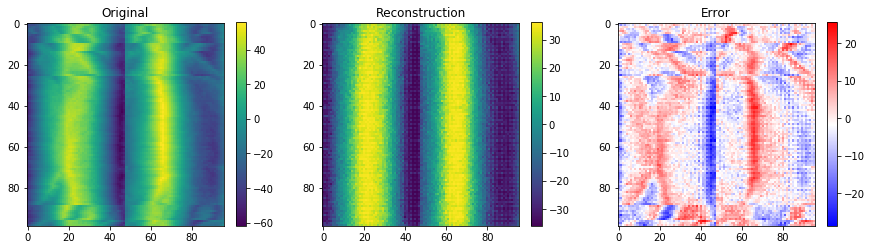

In [206]:
s = -2
# get sample of dynamic shape
sample = vc.get_contours(per_sample=True, aligned=True)[s:s+1]

print(sample.shape)

# reshape to get x and y coordinates in sigle axis
import numpy as np
sample = np.reshape(sample, (*sample.shape[:2], -1), order='F' )

print(sample.shape)

# zero-padding
#sample = [vc.embed_object['stxy', 'vae'].pad_to_next_divisible(s) for s in sample]

for s in sample:
    print(s.shape)

# encode it
encoding = vc.embed_object['stxy', 'vae'].transform( sample )
print(encoding)


# decode it
reconstruction = vc.embed_object['stxy', 'vae'].inverse_transform( encoding )

print(reconstruction.shape)

# plot matrices
fig, ax = plt.subplots(1,3,figsize=(15,5))
ax[0].set_title('Original')
p = ax[0].imshow(sample[0])
fig.colorbar(p, ax=ax[0], shrink=0.75)

ax[1].set_title('Reconstruction')
p = ax[1].imshow(reconstruction[0])
fig.colorbar(p, ax=ax[1], shrink=0.75)

ax[2].set_title('Error')
p = ax[2].imshow(sample[0]-reconstruction[0], cmap='bwr')
fig.colorbar(p, ax=ax[2], shrink=0.75)
plt.show()


In [207]:
# animate original and reconstructed contour
contour = cellshapy.analysis.embedding.tensor_to_contours(sample, format='stxy')
cellshapy.plotting.polygon.animate_contour(np.squeeze(contour), duration=3)


format =  stxy
(1, 99, 48, 2)


In [208]:
contour = cellshapy.analysis.embedding.tensor_to_contours(reconstruction, format='stxy')
cellshapy.plotting.polygon.animate_contour(np.squeeze(contour), duration=3)

format =  stxy
(1, 99, 48, 2)


## Parafac

`parafac` embedding for `stxy` done (0.36 s).


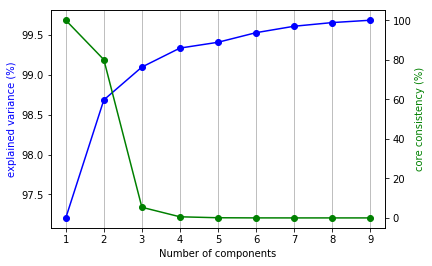

core consistency  explained variance
n_components                                      
1                   100.000000           97.203976
2                    80.063149           98.686599
3                     5.379635           99.099122
4                     0.569302           99.337481
5                     0.082332           99.410546
6                     0.011683           99.531137
7                    -0.000727           99.611855
8                    -0.000703           99.657855
9                    -0.000942           99.687315

In [322]:
vc.embed_morphs(format, 'parafac', n_components=2, save_embedding=True, plot=False)
df_corcondia, _ = vc.parafac_diagnostics(format, max_components=10)
df_corcondia

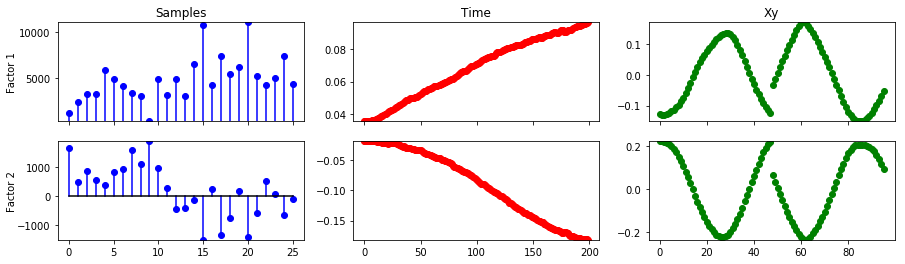

In [323]:
vc.embed_morphs(format, 'parafac', n_components=2, plot=True, verbose=False)

components = None


/home/debacwa/Work/cellshapy/cellshapy/plotting/morphspace.py:93: UserWarning: Projecting from 2 components to 2D using pca.


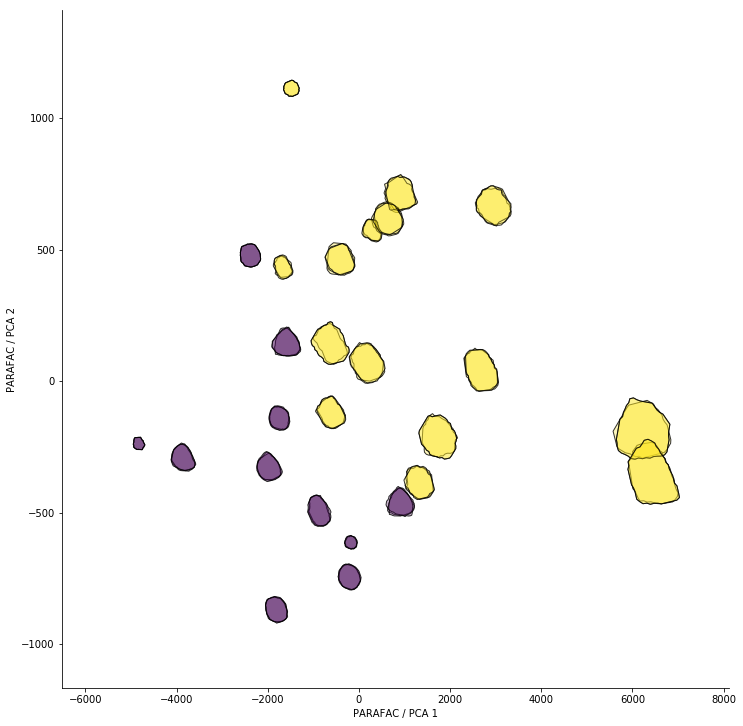

In [325]:
f = 10
fig = vc.morph_space(format, 'parafac', animate=False, frames=[f,f+2,f+4], 
                     shape_size=1, alpha_face=0.3, alpha_edge=0.7, 
                     colorcode='label', projection='pca')

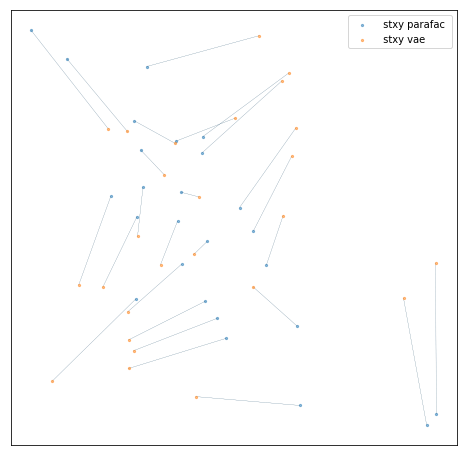

0.9124775678290729

In [326]:
vc.compare_embeddings(('stxy', 'parafac'),('stxy', 'vae'))

## Tucker

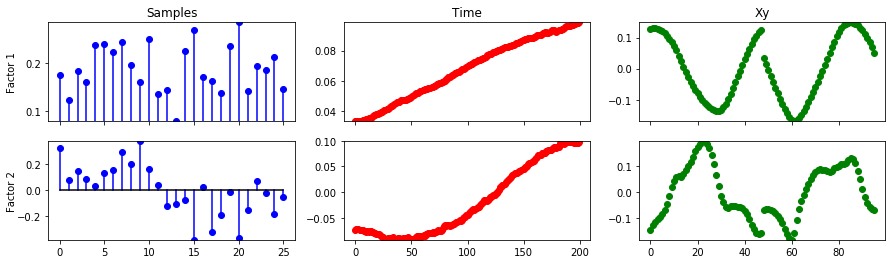

In [327]:
vc.embed_morphs(format, 'tucker', n_components=2, plot=True, verbose=False)

components = None


/home/debacwa/Work/cellshapy/cellshapy/plotting/morphspace.py:93: UserWarning: Projecting from 2 components to 2D using pca.


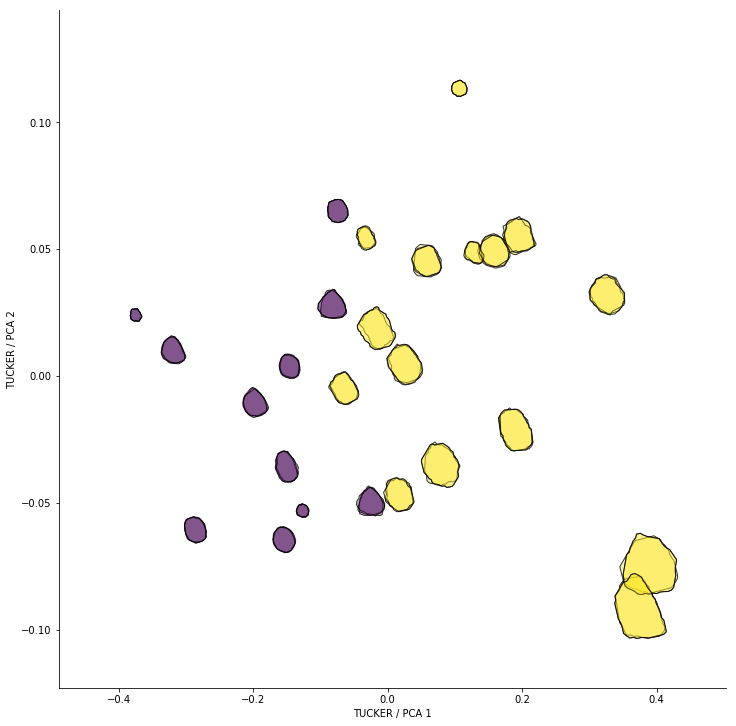

In [332]:
fig = vc.morph_space(format, 'tucker', animate=False, frames=[f,f+2,f+4], 
                     shape_size=1, alpha_face=0.3, alpha_edge=0.7, colorcode='label', 
                     projection='pca')

# Comparison of embeddings

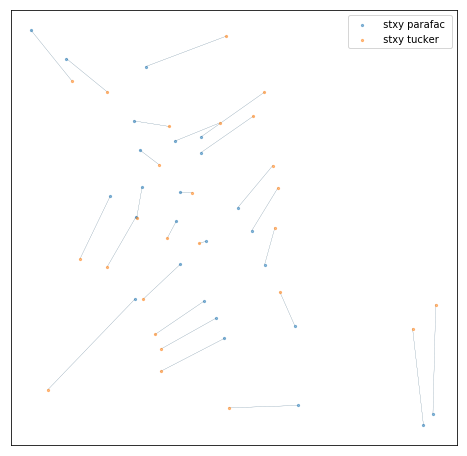

0.6509303370034074

In [333]:
vc.compare_embeddings(('stxy', 'parafac'),('stxy', 'tucker'))

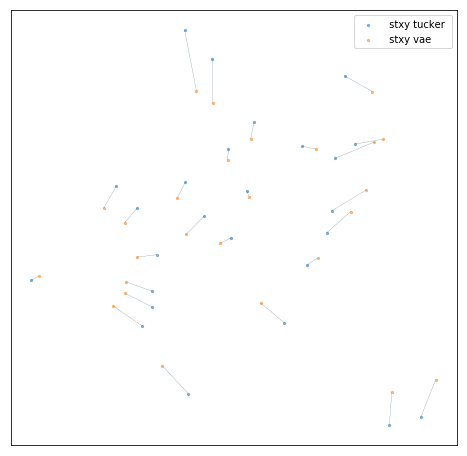

0.30718048216797617

In [334]:
vc.compare_embeddings(('stxy', 'tucker'),('stxy', 'vae'))